# BigMart Sales Prediction!
##### Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 



In [ ]:
# import 'pandas'
import pandas as pd

# import 'numpy'
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm

# import 'stats' package from scipy library
from scipy.stats import stats

# import statistics to perform statistical computations
import statistics

# to test the normality
from scipy.stats import shapiro

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

In [241]:
test=pd.read_csv('test_AbJTz2l.csv')
train=pd.read_csv('train_v9rqX0R.csv')

In [242]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [243]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [244]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


# Steps to building the Model

- Univariate
- Bivariate
- Missing values
- Outliers
- Feature engineering
- Statistical
- Scaling and Transformation

In [245]:
# lets combine the datasets
combined=pd.concat([train,test],ignore_index=True)
combined.shape

(14204, 12)

In [246]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [247]:
combined.select_dtypes(np.number)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
14199,10.50,0.013496,141.3154,1997,NaN
14200,7.60,0.142991,169.1448,2009,NaN
14201,10.00,0.073529,118.7440,2002,NaN
14202,15.30,0.000000,214.6218,2007,NaN


In [248]:
combined.select_dtypes(np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

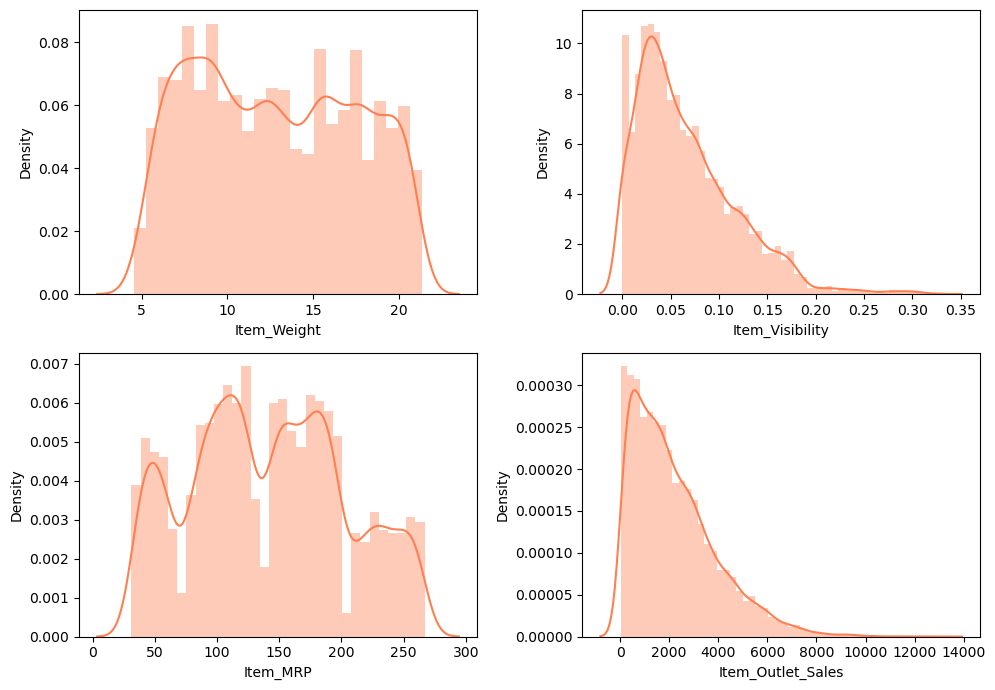

In [249]:
num_cols=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

nrows=2
ncols=2
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(nrows,ncols,t)
    sns.distplot(combined.loc[:,i],color='coral')
    t+=1
plt.tight_layout()
plt.show()


In [250]:
combined.select_dtypes(object).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

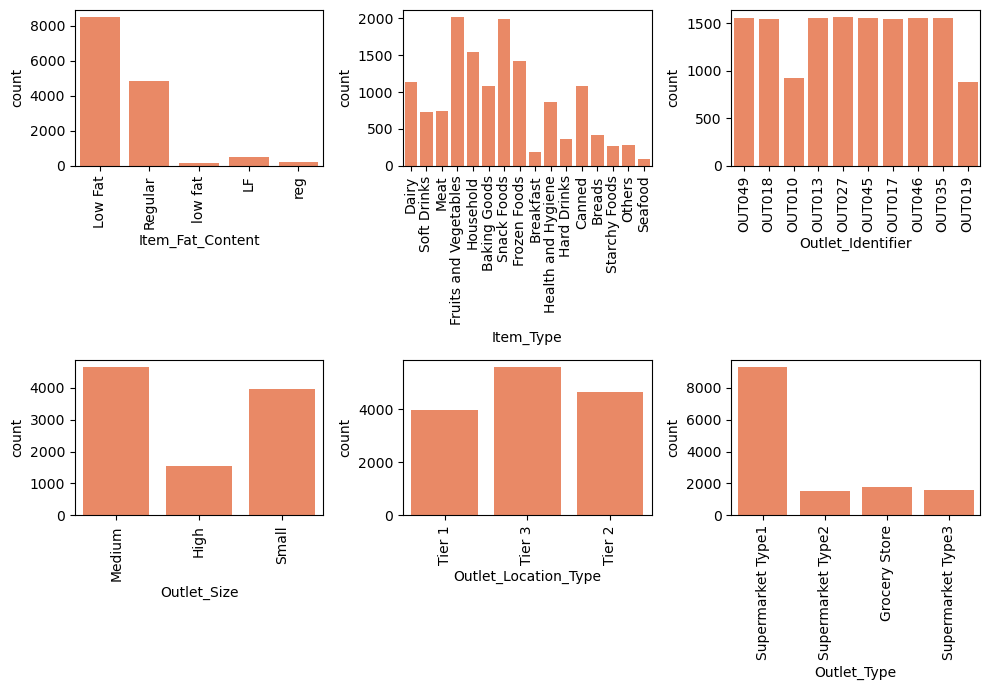

In [251]:
cat_cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows=2
ncols=3
t=1
plt.figure(figsize=(10,7))
for i in cat_cols:
    plt.subplot(nrows,ncols,t)
    sns.countplot(x=combined.loc[:,i],color='coral')
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [252]:
# convert the item fat content
combined['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [253]:
def fat(col):
    if col=='Low Fat' or col=='low fat' or col=='LF':
        return 'low_fat'
    if col=='Regular'or col=='reg':
        return 'regular'
    
combined['Item_Fat_Content']=combined['Item_Fat_Content'].map(fat)


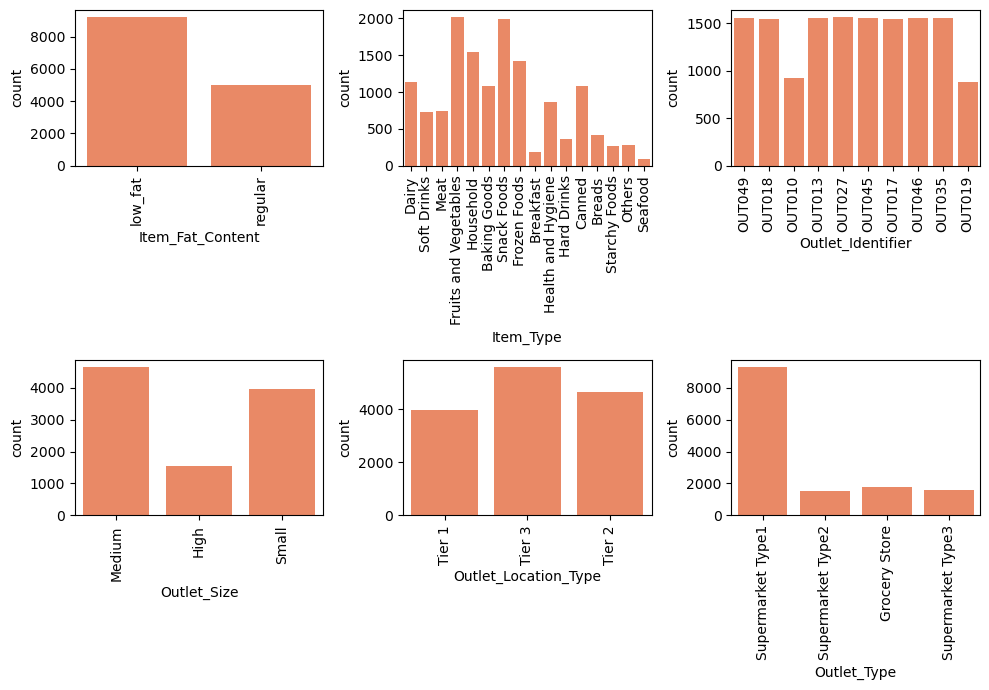

In [254]:

cat_cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows=2
ncols=3
t=1
plt.figure(figsize=(10,7))
for i in cat_cols:
    plt.subplot(nrows,ncols,t)
    sns.countplot(x=combined.loc[:,i],color='coral')
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: xlabel='Item_Type'>

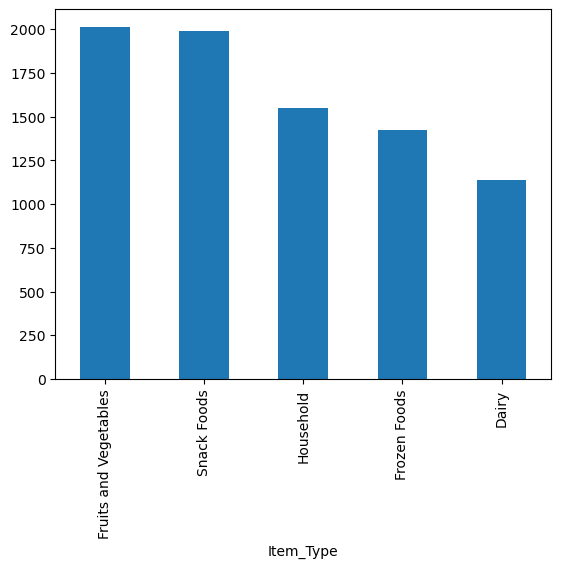

In [255]:
combined['Item_Type'].value_counts()[:5].plot(kind='bar')
# top5: snaks, dairy,frozen food, household, frozen foods, dairy

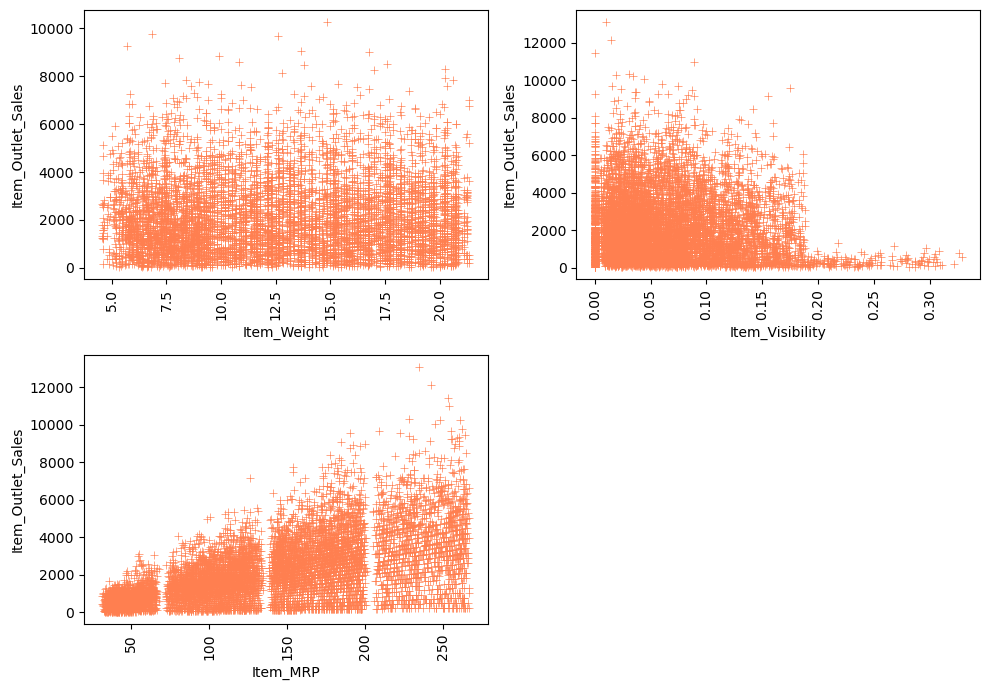

In [256]:
nums=['Item_Weight', 'Item_Visibility', 'Item_MRP']
nrows=2
ncols=2
t=1
plt.figure(figsize=(10,7))
for i in nums:
    plt.subplot(nrows,ncols,t)
    sns.scatterplot(data=combined,y='Item_Outlet_Sales',x=i,color='coral',marker='+')
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

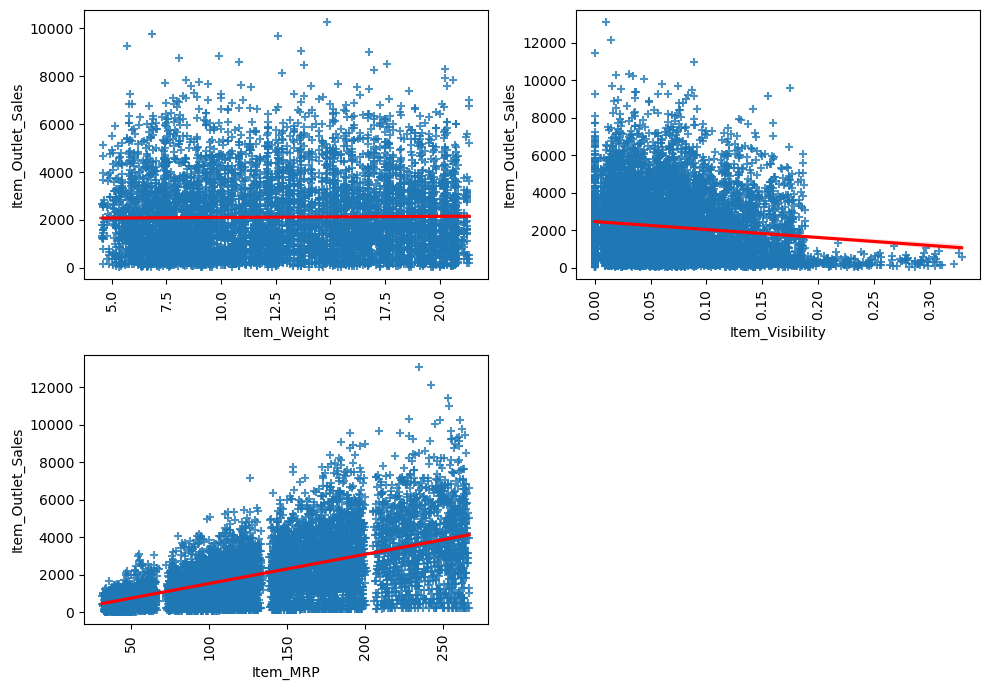

In [257]:
nums=['Item_Weight', 'Item_Visibility', 'Item_MRP']
nrows=2
ncols=2
t=1
plt.figure(figsize=(10,7))
for i in nums:
    plt.subplot(nrows,ncols,t)
    sns.regplot(data=combined,y='Item_Outlet_Sales',x=i,line_kws={'color':'red'},marker='+')
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

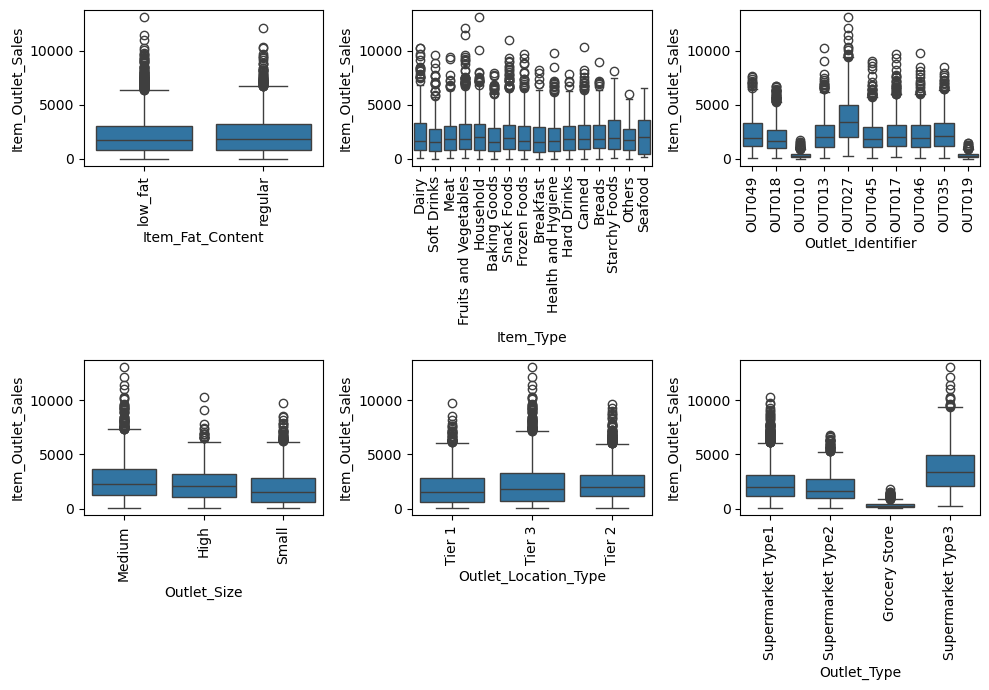

In [258]:
cat_cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
nrows=2
ncols=3
t=1
plt.figure(figsize=(10,7))
for i in cat_cols:
    plt.subplot(nrows,ncols,t)
    sns.boxplot(data=combined,y='Item_Outlet_Sales',x=i)
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [259]:
# missing values
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

<Axes: >

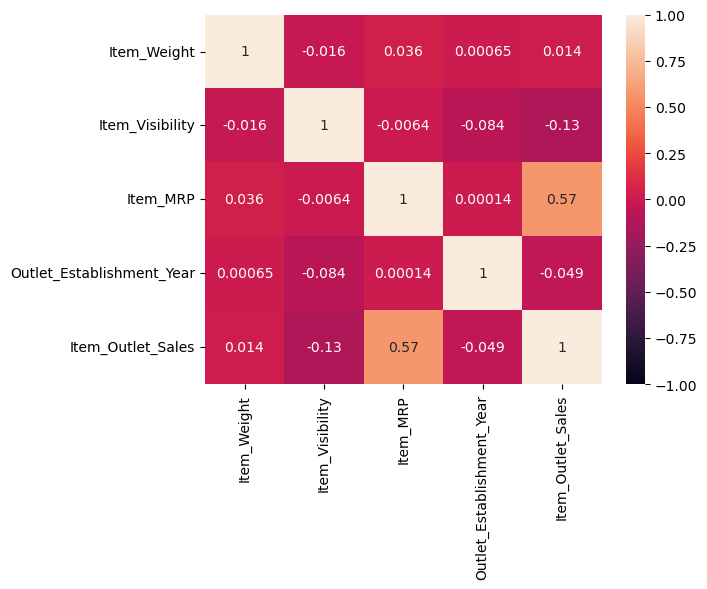

In [260]:
sns.heatmap(combined.select_dtypes(np.number).corr(),vmin=-1,vmax=1,annot=True)

In [261]:
combined.loc[combined['Item_Weight'].isnull(),:].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,low_fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,low_fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,low_fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [262]:
combined.loc[combined['Item_Identifier']=='FDC14',:].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
29,FDC14,NaN,regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
3609,FDC14,14.5,regular,0.041482,Canned,40.0454,OUT017,2007,NaN,Tier 2,Supermarket Type1,209.7270
4297,FDC14,14.5,regular,0.069042,Canned,41.4454,OUT010,1998,NaN,Tier 3,Grocery Store,41.9454
5760,FDC14,14.5,regular,0.000000,Canned,41.0454,OUT018,2009,Medium,Tier 3,Supermarket Type2,545.2902
6257,FDC14,NaN,regular,0.041049,Canned,41.2454,OUT027,1985,Medium,Tier 3,Supermarket Type3,1342.2528


In [263]:
# missing values

combined['Item_Weight']=combined.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [264]:
# missing values

combined['Item_Visibility']=combined.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))

In [265]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [266]:
combined.loc[combined['Outlet_Size'].isnull(),:].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,low_fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [267]:
combined.loc[combined['Outlet_Size'].isnull(),'Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [268]:
combined['Outlet_Size'].groupby(by=combined['Outlet_Type']).value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: count, dtype: int64

In [269]:
combined.loc[combined['Outlet_Size'].isnull(),'Outlet_Size']='Small'

## feature engineering

In [270]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [271]:
# extracting item Id
ids=[]
for i in combined['Item_Identifier']:
    ids.append(i[:2])

In [272]:
combined['Item_Ids']=pd.Series(ids)

In [273]:
combined['Item_Ids'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [274]:
combined[combined['Item_Ids']=='NC']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids
4,NCD19,8.93,low_fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
16,NCB42,11.80,low_fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888,NC
22,NCB30,14.60,low_fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672,NC
25,NCD06,13.00,low_fat,0.099887,Household,45.9060,OUT017,2007,Small,Tier 2,Supermarket Type1,838.9080,NC
31,NCS17,18.60,low_fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14162,NCN26,10.85,low_fat,0.028842,Household,116.9808,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,NC
14164,NCI43,19.85,low_fat,0.026009,Household,49.8376,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,NC
14165,NCL17,7.39,low_fat,0.067885,Health and Hygiene,143.0812,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,NC
14195,NCH42,6.86,low_fat,0.036594,Household,231.1010,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,NC


In [275]:
combined.loc[combined['Item_Ids']=='NC','Item_Fat_Content']='Non_Edible'

In [276]:
combined['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [277]:
perishable=['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast','Breads', 'Starchy Foods', 'Seafood']

In [278]:
def perish(x):
    if x in perishable:
        return 'perishable'
    else:
        return 'non-perishable'

In [279]:
combined['Item_Type_cat']=combined['Item_Type'].apply(perish)

In [280]:
combined.groupby(by='Item_Type')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


In [281]:
combined['magic1']=combined.groupby(by='Item_Type')['Item_Outlet_Sales'].transform('count')
combined['magic2']=combined.groupby(by='Item_Type')['Item_Outlet_Sales'].transform('mean')
combined['magic3']=combined.groupby(by='Item_Type')['Item_Outlet_Sales'].transform('median')
combined['magic4']=combined.groupby(by='Item_Type')['Item_Outlet_Sales'].transform('std')
combined['magic5']=combined.groupby(by='Item_Type')['Item_Outlet_Sales'].transform('max')
combined['magic6']=combined.groupby(by='Item_Type')['Item_Outlet_Sales'].transform('min')

In [282]:
combined['Outlet_Identifier'].isnull().sum()

0

In [283]:
combined['magic7']=combined.groupby(by='Outlet_Identifier')['Item_Outlet_Sales'].transform('count')
combined['magic8']=combined.groupby(by='Outlet_Identifier')['Item_Outlet_Sales'].transform('mean')
combined['magic9']=combined.groupby(by='Outlet_Identifier')['Item_Outlet_Sales'].transform('median')
combined['magic10']=combined.groupby(by='Outlet_Identifier')['Item_Outlet_Sales'].transform('std')
combined['magic11']=combined.groupby(by='Outlet_Identifier')['Item_Outlet_Sales'].transform('max')
combined['magic12']=combined.groupby(by='Outlet_Identifier')['Item_Outlet_Sales'].transform('min')

In [284]:
combined.rename(columns={'magic612':'magic12'},inplace=True)

In [285]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,magic3,magic4,magic5,magic6,magic7,magic8,magic9,magic10,magic11,magic12
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,1650.8511,1884.404698,10256.649,40.6138,930,2348.354635,1966.1074,1513.289464,7646.0472,111.8544
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,1518.0240,1674.249752,9554.230,33.2900,928,1995.498739,1655.1788,1375.932889,6768.5228,69.2432


In [286]:
# split data into test and train
newtrain=combined.loc[0:train.shape[0]-1,:]
newtest=combined.loc[0:test.shape[0]:,:]

newtest.drop('Item_Outlet_Sales',axis=1,inplace=True)

train.shape,test.shape,newtrain.shape,newtest.shape

((8523, 12), (5681, 11), (8523, 26), (5682, 25))

In [287]:
newtrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Ids', 'Item_Type_cat',
       'magic1', 'magic2', 'magic3', 'magic4', 'magic5', 'magic6', 'magic7',
       'magic8', 'magic9', 'magic10', 'magic11', 'magic12'],
      dtype='object')

In [293]:
cols = ['Item_Weight', 'Item_Visibility',
       'Item_MRP','magic1', 'magic2', 'magic3', 'magic4', 'magic5', 'magic6', 'magic7',
       'magic8', 'magic9', 'magic10', 'magic11', 'magic12']
import scipy.stats as stats
pvalue = []

for i in cols:
  teststats, pval = stats.ttest_ind(newtrain.loc[:, i],
                                    newtrain.Item_Outlet_Sales)
  pvalue.append(pval)

pd.DataFrame(pvalue, columns = ["PValue"], index = cols)\
.sort_values("PValue", ascending = False)

,PValue
magic2,1.000000e+00
magic8,1.000000e+00
magic9,3.178472e-49
magic3,9.443741e-98
magic4,1.556293e-145
Item_Weight,0.000000e+00
Item_Visibility,0.000000e+00
Item_MRP,0.000000e+00
magic1,0.000000e+00
magic5,0.000000e+00


In [294]:
# Ho: Item type and target are not related 
# Ha: Ho is false

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model=sfa.ols('Item_Outlet_Sales~Item_Type',data=newtrain).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Item_Type,15.0,1.176182e+08,7.841211e+06,2.700653,0.000388
Residual,8507.0,2.469965e+10,2.903450e+06,NaN,NaN


In [ ]:
# using XGboost regressor
from xgboost import XGBRegressor

In [ ]:
model_xgb=XGBRegressor()